<a href="https://colab.research.google.com/github/Mdhasim-tech/Machine-learning/blob/main/Decision_tree_post_pruning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
iris=sns.load_dataset('iris')
print(iris)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
iris['species']=le.fit_transform(iris['species'])
print(iris)

     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


In [ ]:
X=iris.drop('species',axis=1)
y=iris['species']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=dt.predict(X_test)
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [ ]:
from sklearn.metrics import accuracy_score,classification_report
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
report=classification_report(y_test,y_pred)
print(report)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



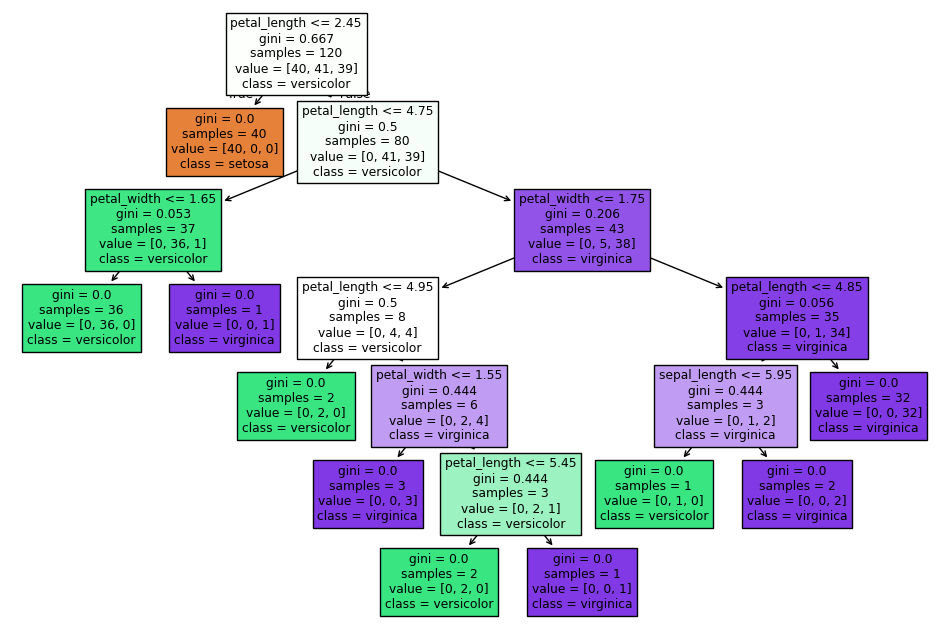

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dt,filled=True,feature_names=X.columns,class_names=['setosa','versicolor','virginica'])
plt.show()

In [ ]:
test_samples = [
    [5.1, 3.5, 1.4, 0.2],  # 0
    [4.9, 3.0, 1.4, 0.2],  # 0
    [5.8, 2.6, 4.0, 1.2],  # 1
    [6.0, 2.2, 4.0, 1.0],  # 1
    [5.6, 2.9, 3.6, 1.3],  # 1
    [6.7, 3.1, 4.4, 1.4],  # 1
    [6.3, 3.3, 6.0, 2.5],  # 2
    [5.8, 2.7, 5.1, 1.9],  # 2
    [7.1, 3.0, 5.9, 2.1],  # 2
    [6.5, 3.0, 5.2, 2.0],  # 2
    [4.8, 3.0, 1.4, 0.1],  # 0
    [5.4, 3.4, 1.7, 0.2],  # 0
    [5.0, 3.5, 1.3, 0.3],  # 0
    [6.9, 3.1, 4.9, 1.5],  # 1
    [5.5, 2.4, 3.7, 1.0],  # 1
    [6.6, 2.9, 4.6, 1.3],  # 1
    [6.1, 2.8, 4.0, 1.3],  # 1
    [6.9, 3.1, 5.4, 2.1],  # 2
    [6.7, 3.3, 5.7, 2.5],  # 2
    [6.4, 2.8, 5.6, 2.2],  # 2
]

true_labels = [
    0, 0, 1, 1, 1, 1, 2, 2, 2, 2,
    0, 0, 0, 1, 1, 1, 1, 2, 2, 2
]


In [ ]:
preds_unpruned = dt.predict(test_samples)
print("Unpruned Predictions:", preds_unpruned)


Unpruned Predictions: [0 0 1 1 1 1 2 2 2 2 0 0 0 2 1 1 1 2 2 2]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
pruned_clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
pruned_clf.fit(X_train, y_train)

preds_pruned = pruned_clf.predict(test_samples)
print("Pruned Predictions:", preds_pruned)


Pruned Predictions: [0 0 1 1 1 1 2 2 2 2 0 0 0 1 1 1 1 2 2 2]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:

print("True Labels:         ", true_labels)
print("Unpruned Correct?    ", preds_unpruned == true_labels)
print("Pruned Correct?      ", preds_pruned == true_labels)


True Labels:          [0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2]
Unpruned Correct?     [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
Pruned Correct?       [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]


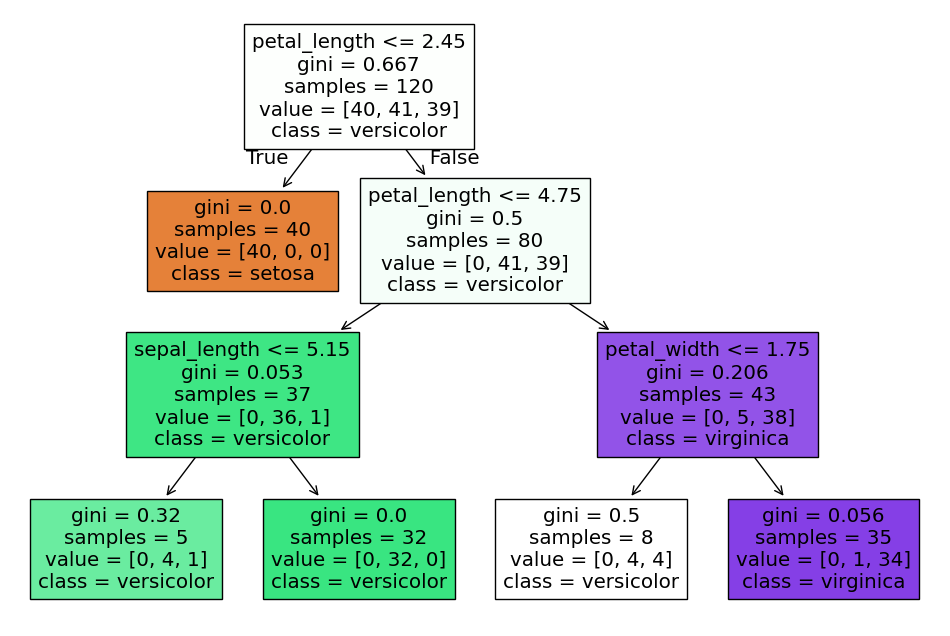

In [ ]:
plt.figure(figsize=(12,8))
plot_tree(pruned_clf,filled=True,feature_names=X.columns,class_names=['setosa','versicolor','virginica'])
plt.show()

In [ ]:
y_pred_pruned=pruned_clf.predict(X_test)
print(y_pred_pruned)
print(classification_report(y_test,y_pred_pruned))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

